## Step 5 Run BikewaySim

1. Process network spatial data into a routable network graph format
2. Reconcile networks into one through node and link overlap conflation
3. Create final network graph and calculate link costs
4. Create OD tables
5. __Run BikewaySim__

## Import Modules

In [1]:
import geopandas as gpd
from pathlib import Path

In [2]:
from bikewaysim_lite import *

## Import Files

In [3]:
#define fp names
studyarea_name = 'bikewaysim'
dir_fp = Path.home() / Path(f'Documents/NewBikewaySimData/{studyarea_name}')

ods = pd.read_csv(dir_fp / Path('all_tazs.csv'))
links = gpd.read_file(dir_fp / Path('final_network.gpkg'),layer='links')
improved_links = gpd.read_file(dir_fp / Path('final_network.gpkg'),layer='improved_links')
#should also have a seperate layer of improved nodes
#imp_nodes = gpd.read_file('trb2023/network.gpkg',layer='imp_nodes')
nodes = gpd.read_file(dir_fp / Path('final_network.gpkg'),layer='nodes')
#tazs = gpd.read_file(dir_fp / Path('base_layers.gpkg'),layer='tazs')

impedances = ['costs0','costs1','costs2']

#reduce size (for testing)
#ods=ods.iloc[0:100,:]

## Snapping

In [4]:
#get network nodes
ods = snap_ods_to_network(ods,nodes)
#need one for improved nodes
#ods_improved = snap_ods_to_network(ods,improved_nodes)

# Bikesheds

c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 33.45367807846421
Bikeshed Size (square miles w/10 ft access distance): 1.8352335986589723


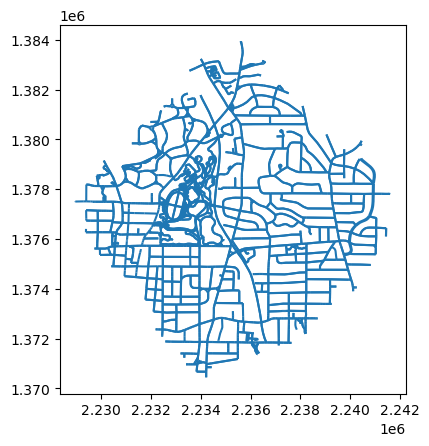

In [5]:
bikeshed = {}
improved_bikeshed = {}
taz = '2044581325'
radius = 10
buffer_size = 100

#just dist
bikeshed['mins'], bikeshed_node = make_bikeshed(links,nodes,taz,ods,radius,buffer_size,'mins')
bikeshed['mins'].plot()

#export
bikeshed['mins'].to_file(dir_fp / Path('bikesheds.gpkg'),layer='mins')
bikeshed_node.to_file(dir_fp / Path('bikesheds.gpkg'),layer='origin')

In [6]:
for impedance in impedances:
    bikeshed[impedance], bikeshed_node = make_bikeshed(links,nodes,taz,ods,radius,buffer_size,impedance)
    bikeshed[impedance].to_file(dir_fp/Path(f'{impedance}/bikesheds.gpkg'),layer='bikeshed')

    #find removed links
    rem_links = bikeshed['mins'][-(bikeshed['mins']['A_B'].isin(bikeshed[impedance]['A_B']))]
    if rem_links.shape[0] > 0:
        rem_links.to_file(dir_fp/Path(f'{impedance}/bikesheds.gpkg'),layer='removed')

    #find added links
    add_links = bikeshed[impedance][-bikeshed[impedance]['A_B'].isin(bikeshed['mins']['A_B'])]
    if add_links.shape[0] > 0:
        add_links.to_file(dir_fp/Path(f'{impedance}/bikesheds.gpkg'),layer='add')

c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 72.54283561174755
Bikeshed Size (square miles w/10 ft access distance): 4.573972224146543


c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 23.011832578831488
Bikeshed Size (square miles w/10 ft access distance): 1.2182071333892919


c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 29.12422181831905
Bikeshed Size (square miles w/10 ft access distance): 1.600229020758616


In [7]:
improved_links

,A,B,A_B,ST_NAME,AR_AUTO,below25,25-30,above30,1laneper,2to3lanesper,...,mu,pbl,bl,dist,mins,imp_factor,costs0,costs1,costs2,geometry
0,2044579814,2044579823,2044579814_2044579823,JOHN LEWIS FREEDOM PKWY NE,Y,0,0,1,0,1,...,0,0,0,709.320000,1.010000,2.50,2.525000,2.525000,2.525000,"LINESTRING (2238293.048 1370792.171, 2238278.0..."
1,2044579808,2044579814,2044579808_2044579814,JOHN LEWIS FREEDOM PKWY NE,Y,0,0,1,0,1,...,0,0,0,171.690000,0.240000,2.50,0.600000,0.600000,0.600000,"LINESTRING (2238307.924 1370621.124, 2238293.0..."
2,2044581591,2017261839,2044581591_2017261839,AVERY DR NE,Y,0,1,0,1,0,...,0,0,0,58.930000,0.080000,1.30,0.104000,0.104000,0.104000,"LINESTRING (2233472.798 1381073.609, 2233463.8..."
3,2017289087,2017289089,2017289087_2017289089,ANSLEY VILLA DR NE,Y,0,1,0,1,0,...,0,0,0,177.150000,0.250000,1.30,0.325000,0.325000,0.325000,"LINESTRING (2233264.382 1384665.450, 2233148.9..."
4,2017289089,2045981947,2017289089_2045981947,ANSLEY VILLA DR NE,Y,0,1,0,1,0,...,0,0,0,316.390000,0.450000,1.30,0.585000,0.585000,0.585000,"LINESTRING (2233088.225 1384676.724, 2233048.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,2044584597,2044584616,2044584597_2044584616,morningside path,None,0,0,0,0,0,...,1,0,0,1413.242788,2.007447,0.25,0.100372,1.003724,0.501862,"LINESTRING (2238487.331 1383946.456, 2238975.3..."
13997,2044581836,2044581825,2044581836_2044581825,None,None,0,0,0,0,0,...,1,0,0,1579.435209,2.243516,0.25,0.112176,1.121758,0.560879,"LINESTRING (2235732.025 1379850.213, 2236280.8..."
13998,201157663548,2044581873,201157663548_2044581873,None,None,0,0,0,0,0,...,1,0,0,1124.601206,1.597445,0.25,0.079872,0.798722,0.399361,"LINESTRING (2236803.968 1380967.356, 2237216.7..."
13999,2044581950,201157663548,2044581950_201157663548,None,None,0,0,0,0,0,...,1,0,0,463.430231,0.658282,0.25,0.032914,0.329141,0.164570,"LINESTRING (2237535.650 1381871.160, 2237636.1..."


In [8]:
#improved version
for impedance in impedances:
    bikeshed['improved' + impedance], _ = make_bikeshed(improved_links,nodes,taz,ods,radius,buffer_size,impedance)
    bikeshed['improved' + impedance].to_file(dir_fp/Path(f'{impedance}/bikesheds.gpkg'),layer='bikeshed')

    #find added links from improvement
    add_impr = bikeshed['improved'+impedance]
    add_impr = add_impr[-add_impr['A_B'].isin(bikeshed[impedance]['A_B'])]
    if add_impr.shape[0] > 0:
        add_impr.to_file(dir_fp/Path(f'{impedance}/bikesheds.gpkg'),layer='improvment add')
    else:
        print('No new links added')

c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 87.82305106199655
Bikeshed Size (square miles w/10 ft access distance): 5.6657050350427705


c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 22.845870481924006
Bikeshed Size (square miles w/10 ft access distance): 1.2085473713235224


c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


---2044581325---
Bikeshed Network Miles: 31.30490570496507
Bikeshed Size (square miles w/10 ft access distance): 1.7096992312231123


In [ ]:
add_impr

# Run shortest path

In [ ]:
#shortest distance version
ods_dist, links, nodes = find_shortest(links, nodes, ods, 'mins')

In [ ]:

#impedance version
ods_imp, links = find_shortest(links, nodes, ods, 'imp')

In [ ]:

#network improvements (replace with imp_nodes)
ods_improved, improved_links = find_shortest(improved_links, nodes, ods, 'imp')

## Betweenness Centrality

In [ ]:
#find difference in btw centrality
links['btw_difference'] = links['dist_btw_cntrlty'] - links['per_dist_btw_cntrlty']

## Percent Detour

In [ ]:
#cacluate pct detour
ods_imp, by_taz_imp = percent_detour(ods_dist,ods_imp,tazs)
ods_improved, by_taz_improved = percent_detour(ods_dist,ods_imp,tazs)

## Basic Stats

In [ ]:
#basic stats
#find avg impedance
ods.dist.mean()
ods.per_dist.mean()
ods.imp_dist.mean()

# Bikesheds

### Find Changes in Bikesheds